# 9기 3주차 과제 정답

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install scipy

## 1. y=10+9X+e에 해당하는 자료(산점도) 구성하기.

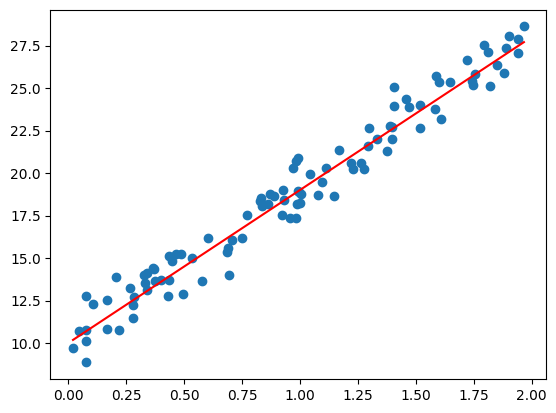

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 난수생성 시드 9
np.random.seed(9)

# 직선식 작성 y=10+9X+e
X=2*np.random.rand(100,1)
e=np.random.randn(100,1)
y=10+9*X+e

# 산점도 그리기
plt.scatter(X,y)

# 과제1 정답
x_line = np.array([X.min(), X.max()])
y_line = 10 + 9*x_line

plt.plot(x_line, y_line, color='red');

## scikit-learn LinearRegression을 이용해 캘리포니아 중간주택가격(='MedHouseVal') 예측
##### **보스턴데이터는 주택가격 데이터셋이 1.2버전부터 제거되어 캘리포니아로 대체

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
%matplotlib inline

# california 데이타셋 로드
housing = fetch_openml(name="house_prices", as_frame=True)

# california 데이타셋 DataFrame 변환
california = fetch_california_housing(as_frame=True)
californiaDF = california['frame']
californiaDF.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* MedInc: 중간 소득  
* HouseAge: 주택 연식  
* AveRooms: 평균 방 수  
* AveBedrms: 평균 침실 수  
* Population: 인구  
* AveOccup: 평균 자가 비율  
* Latitude: 위도  
* Longitude: 경도  
* MedHouseVal: 주택 가격의 중앙값  

### 산점도를 통해 회귀직선 표현

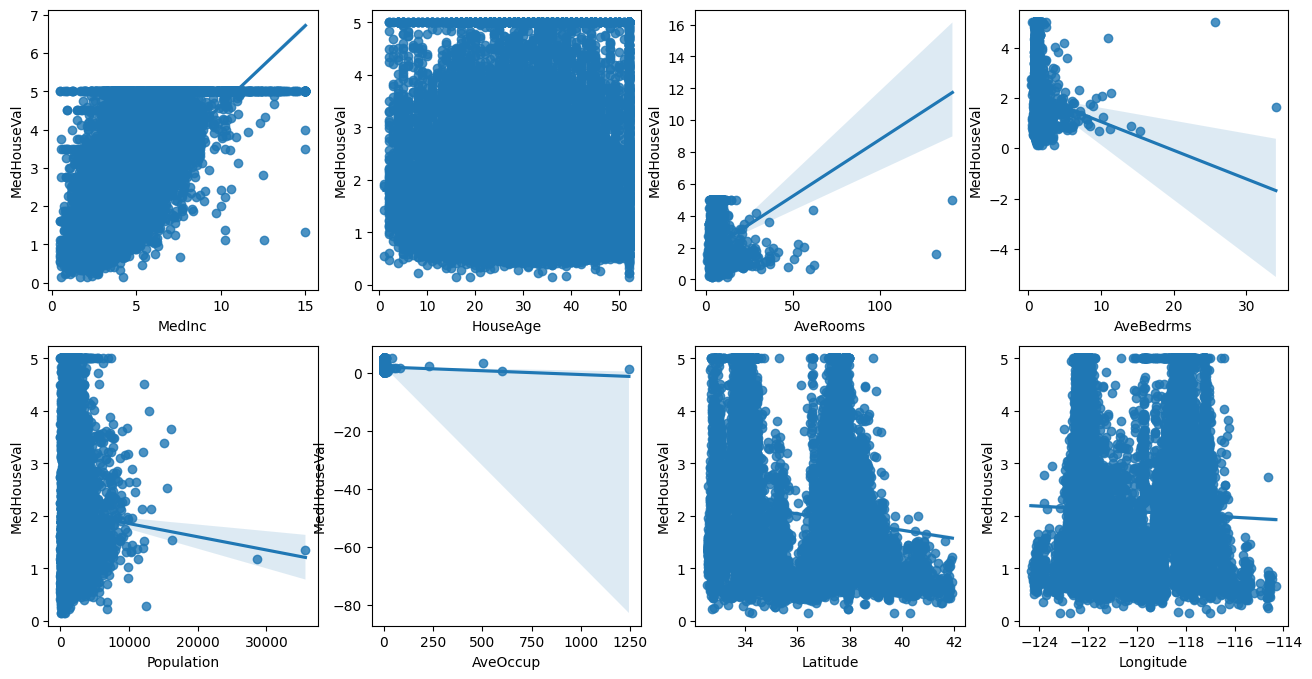

In [4]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms', 'AveBedrms','Population', 'AveOccup',
               'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='MedHouseVal', data=californiaDF, ax=axs[row][col])


### 2. y_target에는 'MedHouseVal', X_data에는 'MedHouseVal'를 제외한 나머지 피처를 이용하여 다중회귀 모델 만들기

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 과제 2 정답
# 데이터 준비
# y_target은 'MedHouseVal', X_data은 'MedHouseVal'이외 칼럼들로 설정
y_target = californiaDF['MedHouseVal']
X_data = californiaDF.drop(columns = ['MedHouseVal'])

# 데이터 분할
# Test Size는 0.3으로 (난수는 자유)
X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                       train_size=0.7,
                                                       random_state=100,
                                                       shuffle=True)

# Linear Regression OLS로 학습/예측/평가 수행
# 모델 생성
lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = mse ** 0.5

# MSE값 출력
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 0.500 , RMSE : 0.707
Variance score : 0.622


In [6]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -37.13403276431887
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [7]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

##### MedHouseVal = - 37.239 + AveBedrms\*0.6 + MedInc\*0.4 + AveRooms*-0.1 + Latitude*-0.4 + Longitude*-0.4

## 3. 릿지회귀

In [8]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인
# X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용
from sklearn.linear_model import Ridge

# 과제3 정답
# 릿지회귀 모형 생성. alpha=10
ridge = Ridge(alpha=10)

# 학습
ridge.fit(X_train, y_train)

# 예측
y_pred = ridge.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('MSE: {0:.3f}'. format(mse))
print('RMSE:{0:.3f}'. format(rmse))

MSE: 0.501
RMSE:0.708


## 4. MAE가 아닌 RMSE를 사용하는 이유는 무엇인가요?

MAE는 실제 값과 예측값의 차이를 절댓값으로 변환해 평균낸 것입니다.   
MAE는 다른 지표들에 비해 직관적이라는 특징을 가지고 있는데, 이러한 장점을 가진 MAE가 아닌 RMSE를 사용하는 이유는 무엇인지 설명해주세요.

RMSE는 각 오차를 제곱하여 계산하기 때문에 큰 오차에 더 큰 가중치를 부여합니다. 이는 모델이 큰 오차에 민감하게 반응하도록 만들어줍니다. 따라서 RMSE는 이상치에 대한 민감도가 높습니다. 또한 제곱을 사용하여 오차를 계산하므로 미분 가능한 손실함수입니다. 이는 RMSE를 최적화 알고리즘에 적용하기 용이하게 만듭니다.

## 5.편향-분산 트레이드 오프에 대해서 자세히 설명후 해결방안을 찾아주세요

### 5-1. 편향 분산의 차이점을 과대과소 적합을 활용하여 설명해주세요  

편향은 모델이 주어진 데이터에 대해 실제값과 예측값 사이의 차이를 나타냅니다. 분산은 모델의 예측이 특정한 데이터 포인트에 대해 얼마나 변동하는지를 나타냅니다. 과대적합된 모델은 편향이 작고 분산이 높습니다. 이 모델은 훈련데이터에 너무 잘 맞춰져 새로운 데이터에 대한 성능이 나빠지는 현상을 보입니다. 과소적합된 모델은 편향이 높고 분산이 작습니다. 이 모델은 훈련 데이터에 대해 너무 단순하여 데이터의 패턴을 충분히 학습하지 못하는 현상을 보입니다. 즉 예측이 정확하지 않을 수 있습니다.

### 5-2. 트레이드 오프 문제점 해결 방안을 서술해주세요

가장 중요한 해결책 중 하나는 적절한 모델을 선택하는 것입니다. 데이터의 복잡성에 맞는 적절한 모델을 선택하여 과소적합과 과대적합을 방지할 수 있습니다. 모델의 복잡성을 조절하는 하이퍼파라미터 조정 및 교차 검증을 통해 적절한 모델을 선택할 수 있습니다.

규제는 모델의 복잡성을 줄여 편향과 분산 사이의 균형을 조정하는 방법입니다. 규제를 통해 과대적합을 방지할 수 있습니다.
대표적인 규제 방법으로는 L1 규제(라쏘 회귀)와 L2 규제(릿지 회귀)가 있습니다. 이들 규제는 모델의 가중치를 제한함으로써 모델의 복잡성을 줄이고 일반화 성능을 향상시킵니다.